# Build the following network:

* That takes a CIFAR10 image (32x32x3)

  > Add 3 Convolutions to arrive at AxAx48 dimensions (e.g. 32x32x3 | 3x3x3x16 >> 3x3x16x32 >> 3x3x32x48)

  > Apply GAP and get 1x1x48, call this X

* Create a block called ULTIMUS that:

  > Creates 3 FC layers called K, Q and V such that:

         X*K = 48*48x8 > 8

         X*Q = 48*48x8 > 8 

         X*V = 48*48x8 > 8 

         then create AM = SoftMax(QTK)/(8^0.5) = 8*8 = 8

         then Z = V*AM = 8*8 > 8

         then another FC layer called Out that:

         Z*Out = 8*8x48 > 48

* Repeat this Ultimus block 4 times

* Then add final FC layer that converts 48 to 10 and sends it to the loss function.

* Model would look like this C>C>C>U>U>U>U>FFC>Loss

* Train the model for 24 epochs using the OCP, Use ADAM as an optimizer. 

* FC Layer 


* SoftMax





1.   [EVA8_API](https://github.com/ojhajayant/EVA8_API) is the main repo which is being cloned here to be able to run the main.py script with various user provided (or default) arg options.







In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Feb 22 13:39:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##  Install the EVA8 packages, hosted @ github

In [2]:
!pip install git+https://git@github.com/ojhajayant//EVA8_API.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/ojhajayant//EVA8_API.git to /tmp/pip-req-build-ah1t5l6t
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/ojhajayant//EVA8_API.git' /tmp/pip-req-build-ah1t5l6t
  Resolved https://****@github.com/ojhajayant//EVA8_API.git to commit 552eac0b22ac3ae95b38b4fa9709c46ac5e79e7a
  Preparing metadata (setup.py) ... done
  Created wheel for EVA8-API: filename=EVA8_API-0.0.0-py3-none-any.whl size=27642 sha256=d28450840547fd4f574089826442b4cf2ac0a10c736bf8580617bdbb15268189
  Stored in directory: /tmp/pip-ephem-wheel-cache-4l1ie0di/wheels/5a/75/07/3896c73523adfee1c7bbad204b8ebeba4397d8209609d9a168
Successfully built EVA8-API


In [3]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [4]:
!pip install albumentations --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [5]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=0c156518d31cabd893e7e48bbaaf6797e7f25e237d3968a375af1154de0fa3c9
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [6]:
!git clone https://git@github.com/ojhajayant//EVA8_API.git

Cloning into 'EVA8_API'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 376 (delta 171), reused 131 (delta 78), pack-reused 99
Receiving objects: 100% (376/376), 216.95 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (219/219), done.


In [7]:
%cd EVA8_API




/content/EVA8_API


In [8]:
%pwd

'/content/EVA8_API'

### Run the main.py script to enable the LR Range test







CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 1e-05
	end_lr : 1.0
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


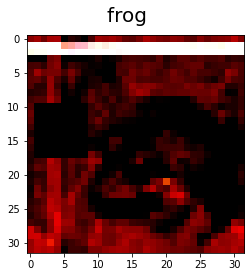

Here are a few samples BEFORE TRANSFORMS APPLIED:


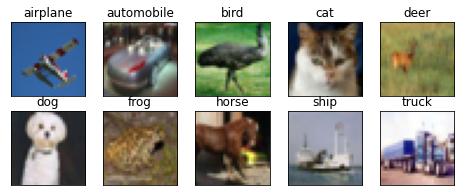

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
              ReLU-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
           Dropout-7           [-1, 32, 32, 32]               0
              ReLU-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]          13,824
      BatchNorm2d-10           [-1, 48, 32, 32]              96
          Dropout-11           [-1, 48, 32, 32]               0
             ReLU-12           [-1, 48, 32, 32]               0
        AvgPool2d-13             [-1, 48, 1, 1]               0
           Linear-14              

  0%|          | 0/980 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (for Least Loss value: 1.6665167901879634 to be used: 0.449476348164608
LR suggestion: steepest gradient
Suggested LR: 8.68E-01


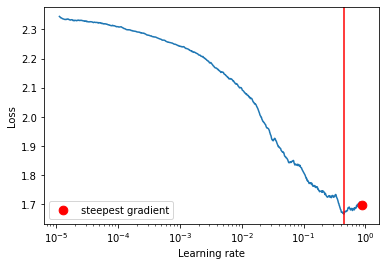

best_lr is 0.449476348164608


In [9]:
%matplotlib inline
%run /content/EVA8_API/main.py --cmd lr_find --init_lr 1e-5 --end_lr 1 --lr_range_test_epochs 10

### With the best_lr found from above "lr_find" run, model is trained by running the main.py script under "train" command



CUDA Available? True

	Here are the different args values for this run:
	cmd : train
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 0.1
	max_lr_epochs : 5
	lr_range_test_epochs : 150
	best_lr : 0.868
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


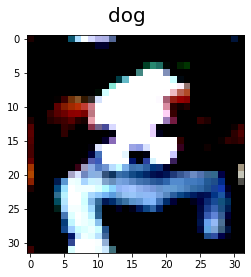

Here are a few samples BEFORE TRANSFORMS APPLIED:


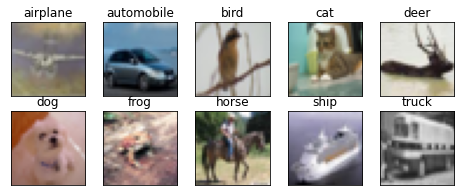

Here are a few samples AFTER TRANSFORMS APPLIED:


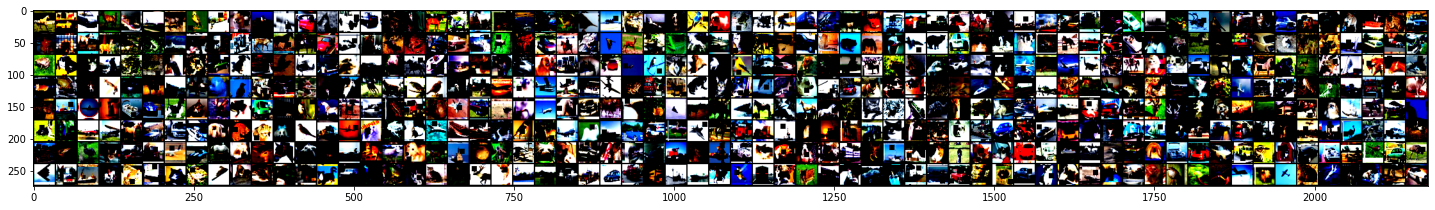

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
              ReLU-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
           Dropout-7           [-1, 32, 32, 32]               0
              ReLU-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]          13,824
      BatchNorm2d-10           [-1, 48, 32, 32]              96
          Dropout-11           [-1, 48, 32, 32]               0
             ReLU-12           [-1, 48, 32, 32]               0
        AvgPool2d-13             [-1, 48, 1, 1]               0
           Linear-14              

Loss=2.4302804470062256 Batch_id=97 Accuracy=9.99: 100%|██████████| 98/98 [00:08<00:00, 11.62it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

validation-accuracy improved from 0 to 10.0, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-10.0.h5
EPOCH: 2
LR: 0.24335950920245397


Loss=2.391749858856201 Batch_id=97 Accuracy=9.98: 100%|██████████| 98/98 [00:07<00:00, 13.56it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 3
LR: 0.39991901840490796


Loss=2.3557114601135254 Batch_id=97 Accuracy=9.99: 100%|██████████| 98/98 [00:07<00:00, 13.77it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 4
LR: 0.5564785276073619


Loss=3.1600539684295654 Batch_id=97 Accuracy=10.02: 100%|██████████| 98/98 [00:07<00:00, 12.78it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 5
LR: 0.7130380368098159


Loss=3.044361114501953 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.53it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 6
LR: 0.8675384962406015


Loss=8.653585433959961 Batch_id=97 Accuracy=10.01: 100%|██████████| 98/98 [00:07<00:00, 13.35it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 7
LR: 0.8223111278195488


Loss=8.557609558105469 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.79it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 8
LR: 0.7770837593984963


Loss=8.4616060256958 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.63it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 9
LR: 0.7318563909774436


Loss=8.404401779174805 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.36it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 10
LR: 0.6866290225563909


Loss=8.345022201538086 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.70it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 11
LR: 0.6414016541353383


Loss=9.504398345947266 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.16it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 12
LR: 0.5961742857142858


Loss=9.258179664611816 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.06it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 13
LR: 0.5509469172932331


Loss=9.140510559082031 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.47it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 14
LR: 0.5057195488721804


Loss=9.061992645263672 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.30it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 15
LR: 0.46049218045112783


Loss=8.999622344970703 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.17it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 16
LR: 0.4152648120300752


Loss=9.352771759033203 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.62it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 17
LR: 0.37003744360902263


Loss=9.290525436401367 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.24it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 18
LR: 0.3248100751879699


Loss=9.244192123413086 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.31it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 19
LR: 0.2795827067669172


Loss=9.206872940063477 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.56it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 20
LR: 0.23435533834586464


Loss=9.177281379699707 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.19it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 21
LR: 0.18912796992481196


Loss=9.154308319091797 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.30it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 22
LR: 0.14390060150375938


Loss=9.137107849121094 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.57it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 23
LR: 0.0986732330827067


Loss=9.125844955444336 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 12.84it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)

EPOCH: 24
LR: 0.05344586466165413


Loss=9.120853424072266 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:07<00:00, 13.34it/s]



Test set: Average loss: 0.0046, Accuracy: 1000/10000 (10.00%)



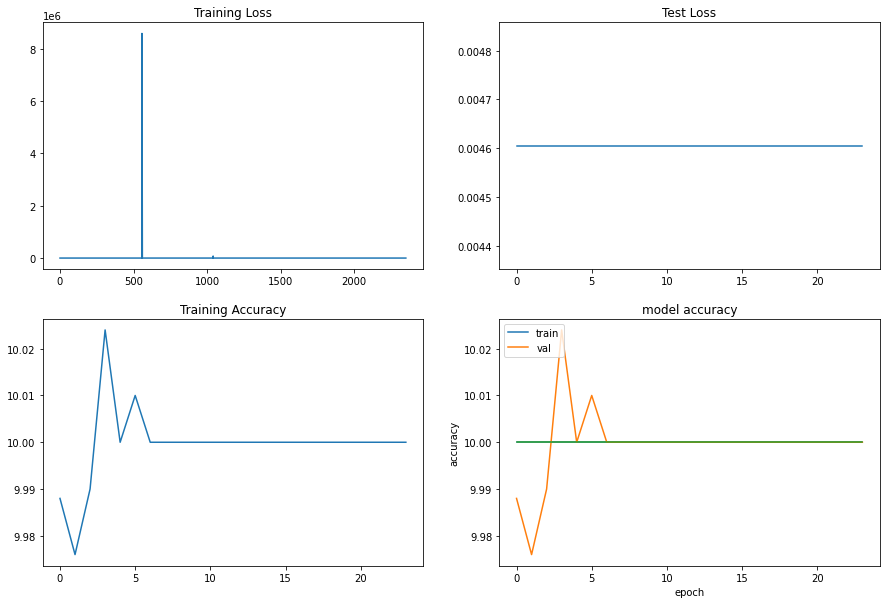

In [9]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd train --best_lr 8.68E-01 

### With the best_model found from above "train" run, saved best model above: CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-10.0.h5 is loaded to get confusion matrix etc.



In [10]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd test --best_model CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-10.0.h5

CUDA Available? True

	Here are the different args values for this run:
	cmd : test
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 0.1
	max_lr_epochs : 5
	lr_range_test_epochs : 150
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model : CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-10.0.h5
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and veri

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
